## Movie-Ratings Analysis

The dataset consists of following attributes: 
**film** (movie names)
**genres**(type of movie)
**ratings**(critic and ausience)
**budget**(in dollars)
**year** (2007 to 2011) 

### Objective
My objective here is to visualize this movie data such that I can derive insights like: which genre of the movie earns more money, how does critic and audience ratings differ from eacother, using which visualizations can be confusing?, and how to project the data visualization so that users can better understand the hidden treasure inside the data.


---

In [1]:
#importing packages

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.getcwd()

'/Users/nevre1a/Desktop/pythonebook/Movie-ratings'

In [2]:
# get the data in movies 
movies = pd.read_csv('/Users/nevre1a/Desktop/pythonebook/Movie-ratings/Movie-Ratings.csv')

In [3]:
# let's get the gist of our data 

movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
# Rename columns for simplicity

movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating','BudgetMillions', 'Year']

In [6]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [7]:
# year does not make any sense. Therefore, use ASTYPE to change year, film, and Genre into categorical values

movies.Year.astype('category') # we need to store this into Year col

movies.Year = movies.Year.astype('category') # Observe the dtype as Category  instead of Object
movies.Year

0      2009
1      2008
2      2009
3      2010
4      2009
       ... 
554    2011
555    2009
556    2007
557    2009
558    2011
Name: Year, Length: 559, dtype: category
Categories (5, int64): [2007, 2008, 2009, 2010, 2011]

In [8]:
movies.Genre = movies.Genre.astype('category')

movies.Film = movies.Film.astype('category')

In [9]:
# What are the unique names in Genre

movies.Genre.unique()

['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance', 'Thriller']
Categories (7, object): ['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance', 'Thriller']

In [10]:
# What are the unique CATEGORIES in Genre

movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

---

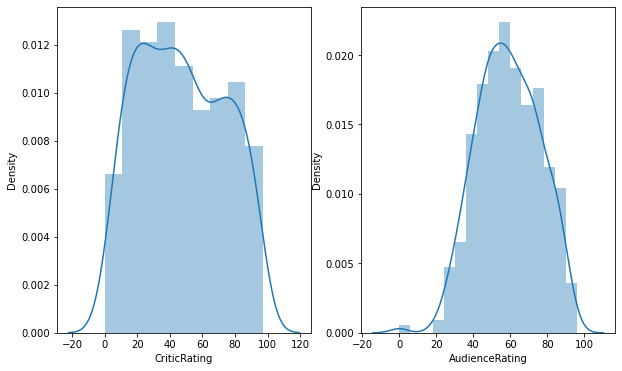

In [12]:
#Critics v/s Audience rating pattern

fig, ax = plt.subplots(1,2,figsize= (10,6))
h1 = sns.distplot(movies.CriticRating, ax=ax[0])
h2 = sns.distplot(movies.AudienceRating, ax=ax[1])

## Jointplot

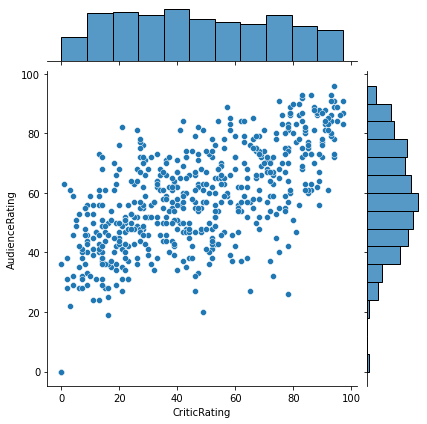

In [13]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

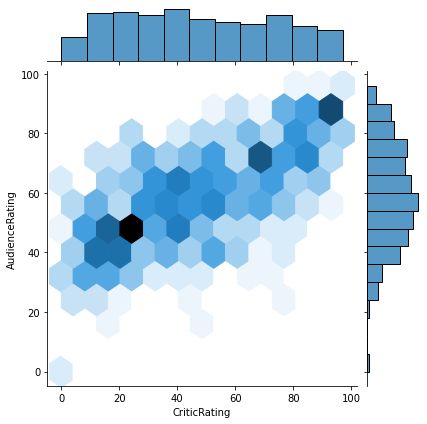

In [14]:
# Try changing the scatter plot to hex ; Study more: SHIFT=TAB
j1= sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind ='hex')

## Histogram

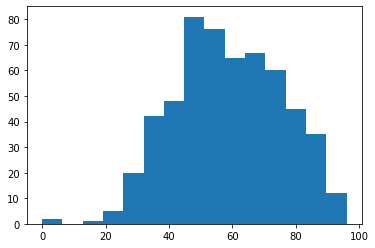

In [15]:
hist = plt.hist(movies.AudienceRating, bins=15) 

# Here the axis is from zero and not from -20 as compared to seaborn charts

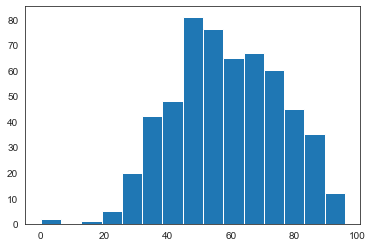

In [16]:
sns.set_style('white') # This will be applied to entire notebook; so to change it back to having grid, use style as'darkgrid'
hist = plt.hist(movies.AudienceRating, bins=15) 

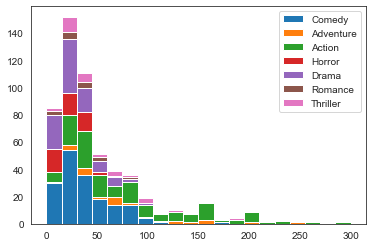

In [17]:
#Stacked histogram

genreList = list()
mylabels =list()

for genre in movies.Genre.unique():  # can also use >>>> movies.Genre.cat.categories
    genreList.append(movies[movies.Genre == genre].BudgetMillions)
    mylabels.append(genre)   

plt.hist(genreList, bins=20, stacked = True, rwidth=1, label= mylabels)
plt.legend()
plt.show()

---

## Scatter Plot

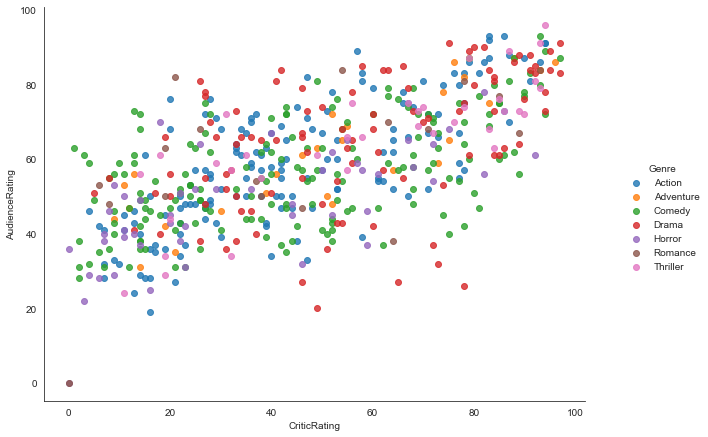

In [18]:
#Scatter Plot

g = sns.lmplot(data = movies, x = 'CriticRating', y = 'AudienceRating', hue = 'Genre', height = 6, fit_reg = False)
g.fig.set_figwidth(10)

## Kernel Density Estimate: KDE plot

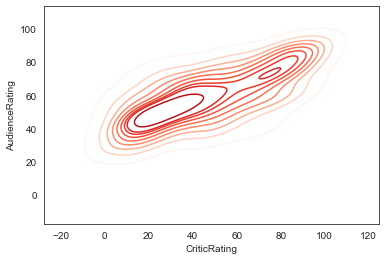

In [19]:
k1= sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

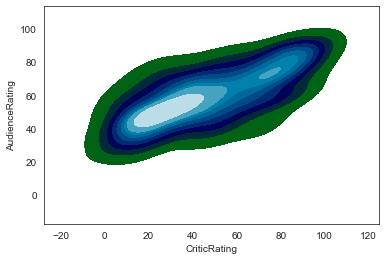

In [20]:
# adding some color using Shade and cmap

k1= sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade =True, shade_lowest=False, cmap='ocean')

---

## Subplots 
for sophisticated visualization


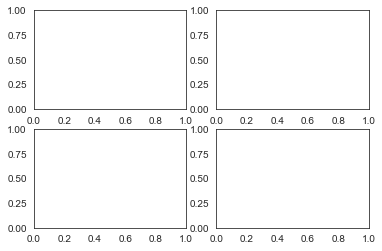

In [21]:
# we need to specify figure and axes to get subplots
# Subplots belongs to matplotlib, therefore use plt

fig, axes = plt.subplots(2,2) #2D

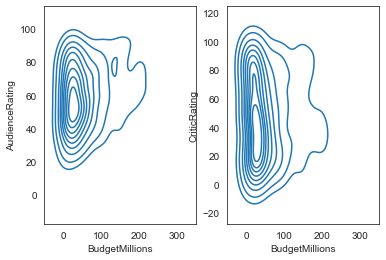

In [22]:
fig, axes = plt.subplots(1,2)

k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax= axes[0])
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax= axes[1])

In [23]:
# for 2D we can simply change the numbers as nrows=2, ncols=2;
#However, we need to change the axes in the plot accordingly to 2d; ax=axes[0,0]

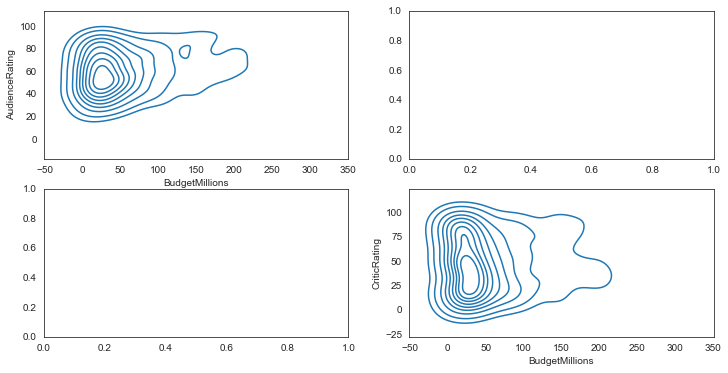

In [24]:
fig, axes = plt.subplots(2,2, figsize=(12,6))

k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax= axes[0,0])
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax= axes[1,1])

---

[(-20.0, 200.0)]

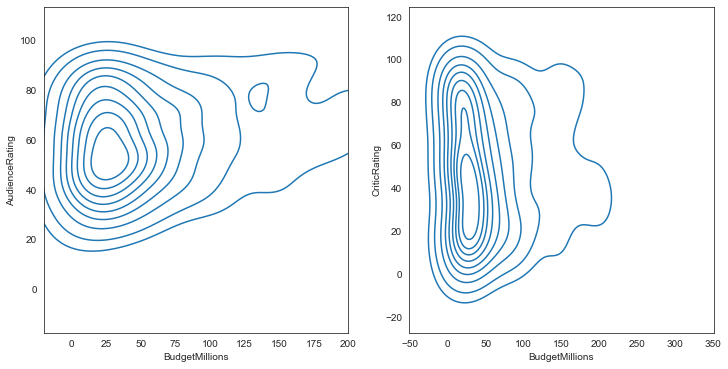

In [25]:
#the axis needs modification as points actually lie to the left of the plot

fig, axes = plt.subplots(1,2, figsize=(12,6))

k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax= axes[0])
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax= axes[1])

k1.set(xlim=(-20,200))
# the k2 plot hasn't changed so we can either copy the same line for k2;
# Else we can use a PARAMETER called sharex and sharey and set it as True


---

## Violin plots and Box Plots


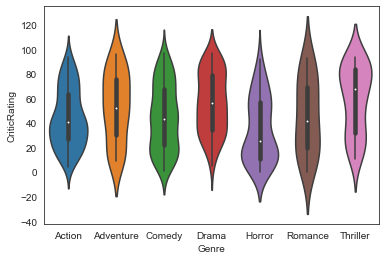

In [26]:
vv = sns.violinplot(data= movies, x='Genre', y='CriticRating')


---

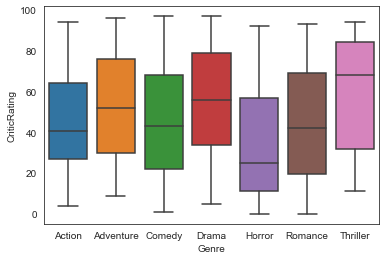

In [27]:
bp = sns.boxplot(data= movies, x='Genre', y='CriticRating')


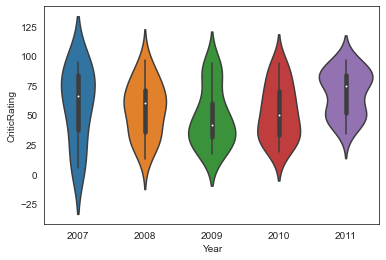

In [28]:
v = sns.violinplot(data= movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

---

## Facet Grid

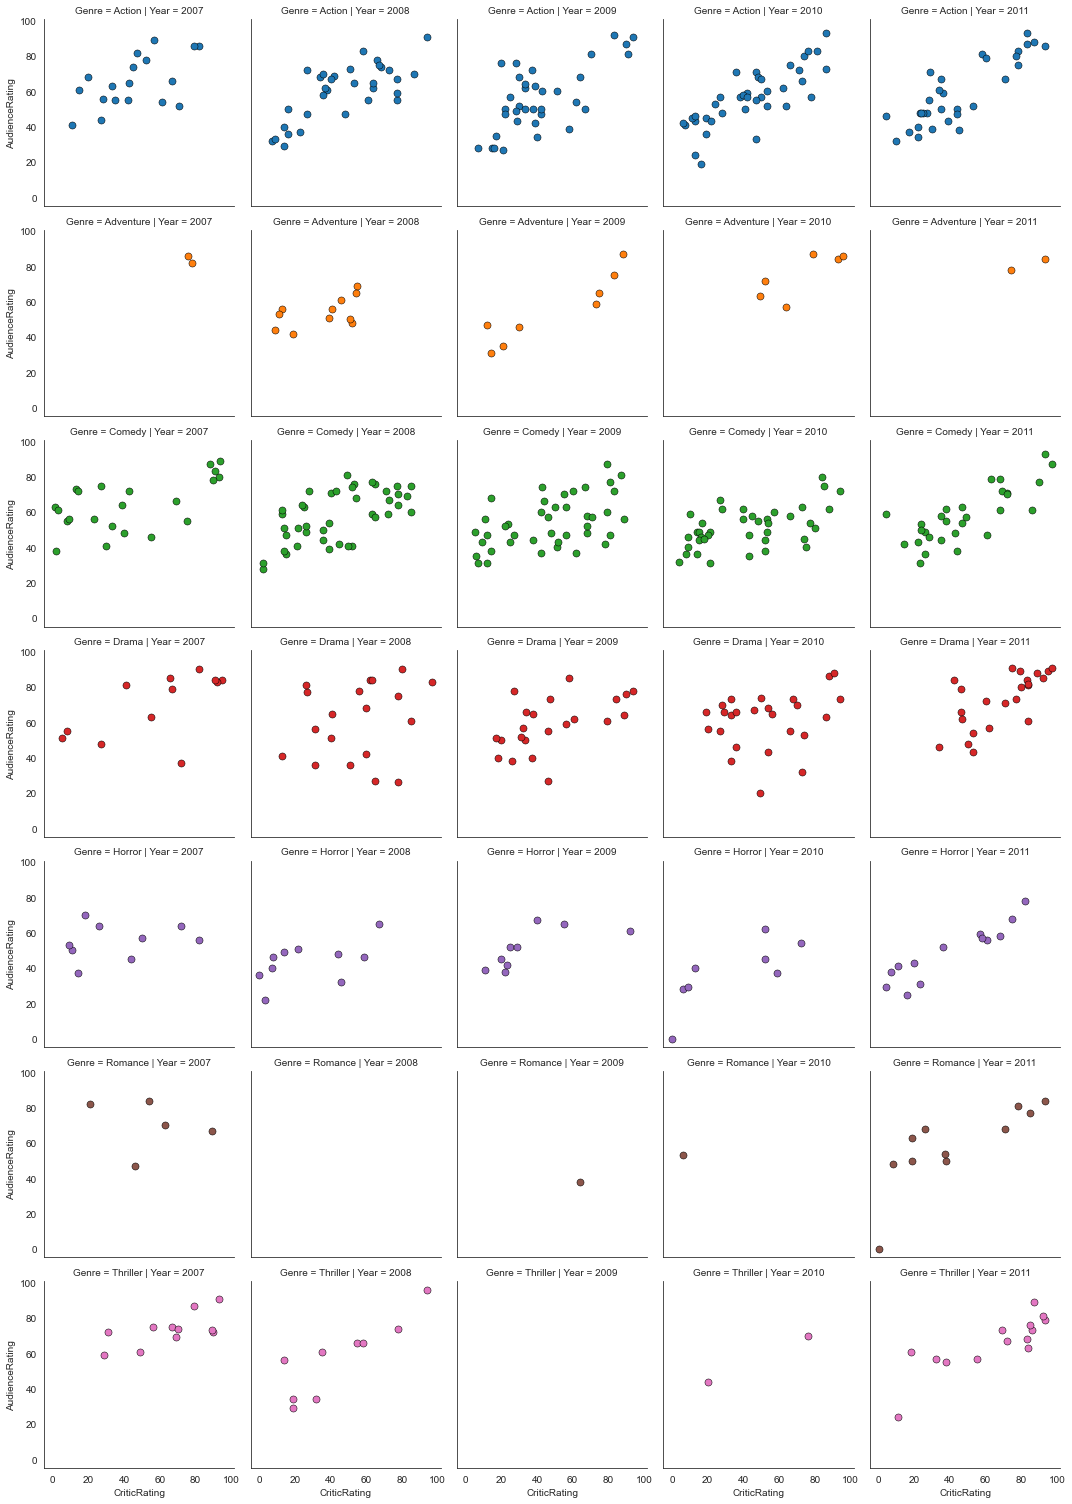

In [29]:
My_facet = sns.FacetGrid(movies, row= 'Genre', col = 'Year', hue= 'Genre')
kws = dict(s= 50, linewidth= 0.5, edgecolor= 'black') # dictionary

My_facet = My_facet.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)


---

---

## Dashboard

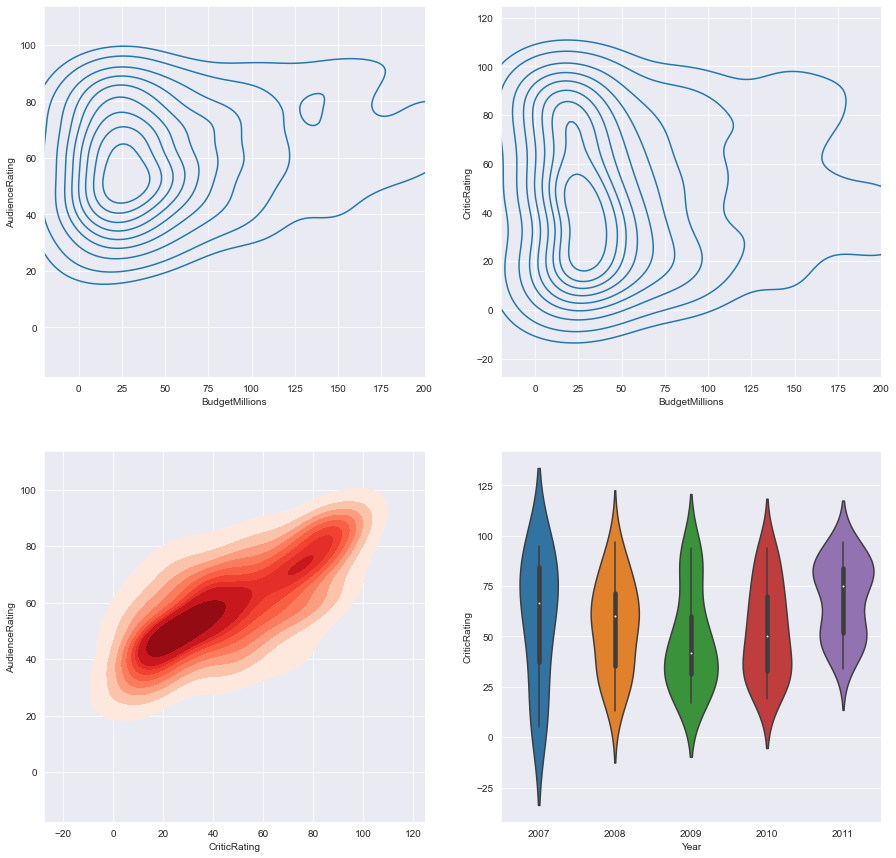

In [30]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(2,2, figsize=(15,15))

k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax= axes[0,0])
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax= axes[0,1])
k1.set(xlim=(-20,200))
k2.set(xlim=(-20,200))


k11= sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade =True, shade_lowest=False, cmap='Reds',\
               ax=axes[1,0])
v = sns.violinplot(data= movies[movies.Genre=='Drama'], x='Year', y='CriticRating',ax= axes[1,1])


---

---

## Dashboard 

In [31]:
# here lets see how to add a plot which is not a seaborn plot

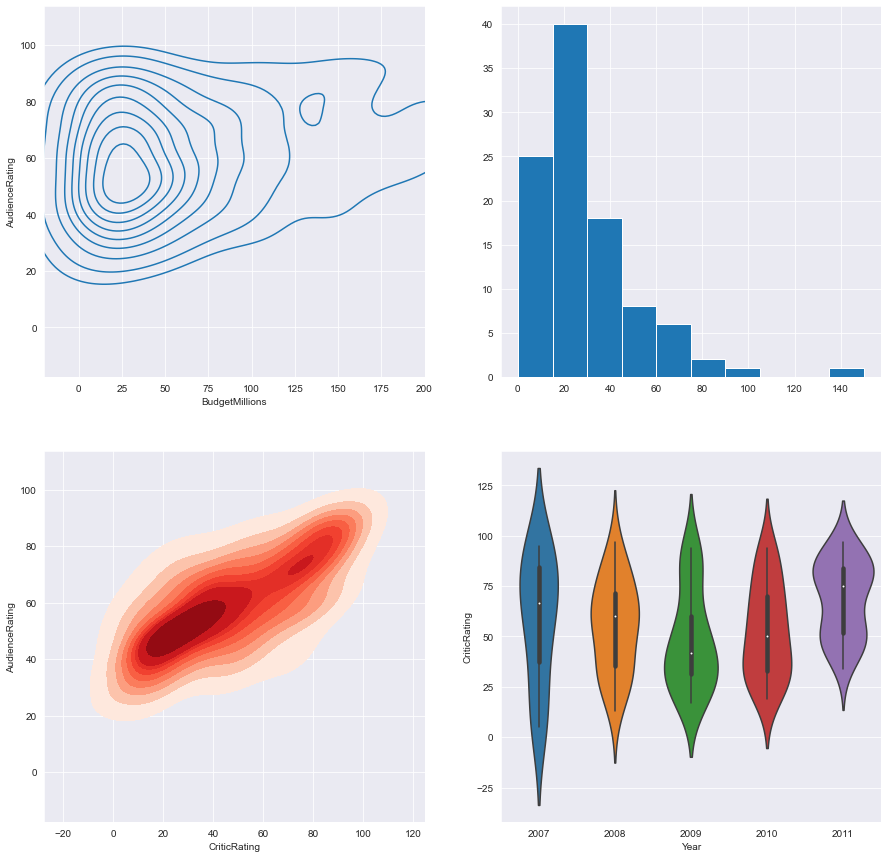

In [32]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(2,2, figsize=(15,15))

k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax= axes[0,0])
#k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax= axes[0,1])
k1.set(xlim=(-20,200))
#k2.set(xlim=(-20,200))

axes[0,1].hist(movies[movies.Genre == 'Drama'].BudgetMillions) 
k11= sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade =True, shade_lowest=False, cmap='Reds',\
               ax=axes[1,0])
v = sns.violinplot(data= movies[movies.Genre=='Drama'], x='Year', y='CriticRating',ax= axes[1,1])


## Learn to Style the Dashboard

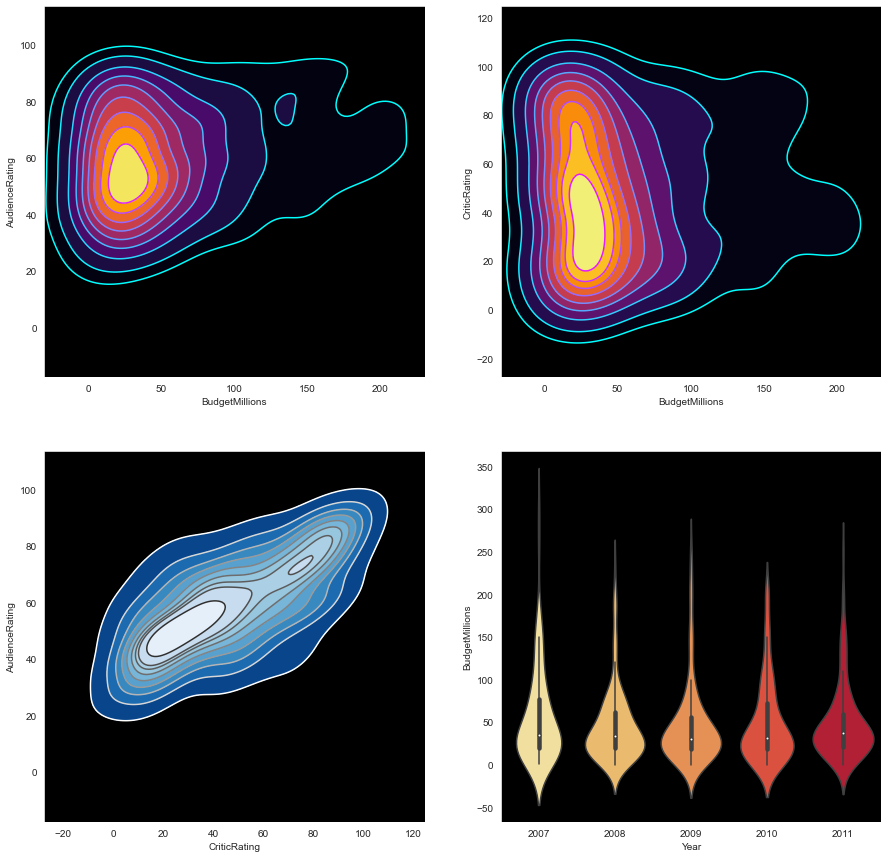

In [33]:
sns.set_style('dark', {'axes.facecolor':'black'}) # white, dark, darkgrid,ticks, whitegrid

fig, axes = plt.subplots(2,2, figsize=(15,15))
#Plot1 
k1= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax= axes[0,0],shade =True, \
                shade_lowest=False, cmap='inferno')

k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax= axes[0,0], cmap='cool')

#Plot 2
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax= axes[0,1],shade =True, \
                shade_lowest=False, cmap='inferno')
k2= sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax= axes[0,1], cmap='cool')

k1.set(xlim=(-30,230))
k2.set(xlim=(-30,230))

#plot 3
k11= sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade =True, shade_lowest=False, cmap='Blues_r',\
               ax=axes[1,0])

k11= sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r',\
               ax=axes[1,0])

#plot 4
v = sns.violinplot(data= movies, x='Year', y='BudgetMillions',ax= axes[1,1], palette='YlOrRd')
